## Sales dataset project 
Objectives
1. Import the sales dataset into a Pandas Data Frame and get familiar with its structure and content.
2. Identify and handle missing values, remove duplicates, fix formatting issues (extra spaces), and convert columns to appropriate data types.
3. Use descriptive statistics and aggregation techniques to explore trends, distributions, and group-wise summaries.
4. Answer key business questions using Python and Pandas.

In [1]:
#importing the neccessary libraries
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np 
import missingno as mno 
import warnings 
warnings.filterwarnings('ignore') 
%matplotlib inline
sns.set(style='whitegrid')
print('successful') 

successful


## Objectives

In [3]:
#import the dataset
file_path = r"C:\Users\user\OneDrive\Desktop\Axia Africa Project files\Python_SalesData.xlsx"
df= pd.read_excel(file_path)
print ('successful') 

successful


In [4]:
# exploring the dataset
df.head (5)

,Unnamed: 0,Order ID,Date,Product,Price,Quantity,Purchase Type,Payment Method,Manager,City
0,NaN,10452,2022-11-07,Fries,3.49,573.065903,Online,Gift Card,Tom Jackson,London
1,NaN,10453,2022-11-07,Beverages,2.95,745.762712,Online,Gift Card,Pablo Perez,Madrid
2,NaN,10454,2022-11-07,Sides & Other,4.99,200.400802,In-store,Gift Card,Joao Silva,Lisbon
3,NaN,10455,2022-11-08,Burgers,12.99,569.668976,In-store,Credit Card,Walter Muller,Berlin
4,NaN,10456,2022-11-08,Chicken Sandwiches,9.95,201.005025,In-store,Credit Card,Walter Muller,Berlin


# Data Cleaning 
1. Identify and handle missing values.
2. remove duplicates, fix formatting issues (extra spaces).
3. convert columns to appropriate data types.

In [6]:
# Identify and Handling missing values 
print (f"missing values before filling :\n",df.isnull().sum())

missing values before filling :
 Unnamed: 0        254
Order ID            0
Date                0
Product             0
Price               0
Quantity            0
Purchase Type       0
Payment Method      0
Manager             0
City                0
dtype: int64


## we noticed a column 'unnamed:0' with missing values so we removed it

In [7]:
df=df[['Order ID', 'Date', 'Product', 'Price', 'Quantity', 'Purchase Type','Payment Method','Manager','City']] 
df.head(5) 

,Order ID,Date,Product,Price,Quantity,Purchase Type,Payment Method,Manager,City
0,10452,2022-11-07,Fries,3.49,573.065903,Online,Gift Card,Tom Jackson,London
1,10453,2022-11-07,Beverages,2.95,745.762712,Online,Gift Card,Pablo Perez,Madrid
2,10454,2022-11-07,Sides & Other,4.99,200.400802,In-store,Gift Card,Joao Silva,Lisbon
3,10455,2022-11-08,Burgers,12.99,569.668976,In-store,Credit Card,Walter Muller,Berlin
4,10456,2022-11-08,Chicken Sandwiches,9.95,201.005025,In-store,Credit Card,Walter Muller,Berlin


In [8]:
# Checked for duplicate  
df.duplicated().any()

np.False_

## Handling extra spaces (formatting)


In [9]:
# checked for extra spaces (formatting)
df.applymap(lambda x: isinstance(x, str) and (" " in x)).any().any()

np.True_

In [10]:
# removed extra spaces
import re  # Added import statement for the re module
df = df.applymap(lambda x: re.sub(r'\s+', ' ', x).strip() if isinstance(x, str) else x)
print ('successful')

successful


In [11]:
# checked for data type 
df.dtypes

Order ID                   int64
Date              datetime64[ns]
Product                   object
Price                    float64
Quantity                 float64
Purchase Type             object
Payment Method            object
Manager                   object
City                      object
dtype: object

## Exploring the dataset

In [12]:
# summary of the statistics of the dataset
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Order ID,254.0,10584.133858,10452.0,10520.25,10583.5,10649.75,10713.0,75.889181
Date,254,2022-12-03 10:23:37.322834688,2022-11-07 00:00:00,2022-11-21 00:00:00,2022-12-03 00:00:00,2022-12-16 18:00:00,2022-12-29 00:00:00,NaN
Price,254.0,7.102323,2.95,3.49,4.99,9.95,29.05,4.341855
Quantity,254.0,460.610541,200.400802,201.005025,538.876059,677.444188,754.426482,214.889551


In [13]:
# checking the dataset info   
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254 entries, 0 to 253
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Order ID        254 non-null    int64         
 1   Date            254 non-null    datetime64[ns]
 2   Product         254 non-null    object        
 3   Price           254 non-null    float64       
 4   Quantity        254 non-null    float64       
 5   Purchase Type   254 non-null    object        
 6   Payment Method  254 non-null    object        
 7   Manager         254 non-null    object        
 8   City            254 non-null    object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 18.0+ KB


In [14]:
#checking the columns of the dataset 
df.columns

Index(['Order ID', 'Date', 'Product', 'Price', 'Quantity', 'Purchase Type',
       'Payment Method', 'Manager', 'City'],
      dtype='object')

In [15]:
df.corr

<bound method DataFrame.corr of      Order ID       Date             Product  Price    Quantity Purchase Type  \
0       10452 2022-11-07               Fries   3.49  573.065903        Online   
1       10453 2022-11-07           Beverages   2.95  745.762712        Online   
2       10454 2022-11-07       Sides & Other   4.99  200.400802      In-store   
3       10455 2022-11-08             Burgers  12.99  569.668976      In-store   
4       10456 2022-11-08  Chicken Sandwiches   9.95  201.005025      In-store   
..        ...        ...                 ...    ...         ...           ...   
249     10709 2022-12-28       Sides & Other   4.99  200.400802    Drive-thru   
250     10710 2022-12-29             Burgers  12.99  754.426482    Drive-thru   
251     10711 2022-12-29  Chicken Sandwiches   9.95  281.407035    Drive-thru   
252     10712 2022-12-29               Fries   3.49  630.372493    Drive-thru   
253     10713 2022-12-29           Beverages   2.95  677.966102    Drive-thru

## Answering the business questions

## Q1. What was the Most Preferred Payment Method?
*NOTE* : The most preferred payment method is "credit card" with "120" records.

In [17]:
payment_counts = df['Payment Method'].value_counts()
print (payment_counts)

Payment Method
Credit Card    120
Cash            76
Gift Card       58
Name: count, dtype: int64


## Q2. Which one was the Most Selling Product by Quantity and by Revenue?
*NOTE* : "Beverages" is the most selling product by Quantity. While
"Burgers" is the most selling product by Revenue.

In [18]:
# the most selling product by quantity.
most_selling_product_by_Quantity = df.groupby ('Product') ['Quantity'].sum().sort_values(ascending=False)
print (most_selling_product_by_Quantity)

Product
Beverages             34983.050847
Fries                 32034.383954
Burgers               29022.324865
Chicken Sandwiches    11135.678392
Sides & Other          9819.639279
Name: Quantity, dtype: float64


In [19]:
#calculating the revenue 
df['Revenue'] = df['Quantity']*df['Price']
most_selling_product_by_Revenue = df.groupby('Product') ['Revenue'].sum().sort_values(ascending=False)
print (most_selling_product_by_Revenue) 

Product
Burgers               377000.000000
Fries                 125674.498567
Chicken Sandwiches    114639.195980
Beverages             103200.000000
Sides & Other          49000.000000
Name: Revenue, dtype: float64


## Q3. Which City had maximum revenue, and Which Manager earned maximum revenue?
*NOTE* "Lisbon" city had the maximum revenue,and "Joao Silva" earned the maximum revenue.

In [20]:
# maximum revenue by city
Max_revenue_by_City = df.groupby ('City') ['Revenue'].sum().sort_values(ascending=False)
Max_revenue_by_City.head(5)

City
Lisbon    241713.694547
London    211200.000000
Madrid    136200.000000
Berlin    100600.000000
Paris      79800.000000
Name: Revenue, dtype: float64

In [23]:
# mximum revenue earned by manager 
Max_revenue_earned_by_Manager = df.groupby('Manager') ['Revenue'].sum().sort_values(ascending=False)
Max_revenue_earned_by_Manager.head(5) 

Manager
Joao Silva       241713.694547
Tom Jackson      211200.000000
Pablo Perez      136200.000000
Walter Muller    100600.000000
Remy Monet        79800.000000
Name: Revenue, dtype: float64

## Q4.What was the Average Revenue?
*NOTE* : the average revenue is  "3029.5814745954126". 

In [22]:
Avg_Revenue = df['Revenue'].mean()
print (f'{Avg_Revenue} is the average revenue for the order id')

3029.5814745954126 is the average revenue for the order id


## Q5.What was the Average Revenue of November & December?
*NOTE*: The average revenue for November is "2939.05",while December is "3102.12".

In [24]:
# Extract month name 
df['Month'] = df['Date'].dt.month_name() 
df.head (0)

,Order ID,Date,Product,Price,Quantity,Purchase Type,Payment Method,Manager,City,Revenue,Month


In [25]:
# average revenue for November 
avg_rev_ = df.groupby('Month') ['Revenue'].mean() 
#Get nov & dec 
Nov_avg_rev = avg_rev_.get('November')
Dec_avf_rev = avg_rev_.get('December')
print (f'{Nov_avg_rev} is the average revenue for november') 
print (f'{Dec_avf_rev} is the average revenue for december')

2939.0592437808386 is the average revenue for november
3102.127659574468 is the average revenue for december


## Q6.What was the Standard Deviation of Revenue and Quantity?
*NOTE*: the revenue standard deviation is "2420.1",while quantity standard deviation is "214.8".


In [26]:
# Standard deviation for revenue 
Revenue_std = df['Revenue'].std()
print ( f'{Revenue_std} is the revenue standard deviation')

2420.1241927718024 is the revenue standard deviation


In [27]:
# Standard deviation for Quantity  
Quantity_std = df['Quantity'].std() 
print (f'{Quantity_std} is the quantity standard deviation') 

214.88955129185305 is the quantity standard deviation


## Q7. What was the Variance of Revenue and Quantity?
*NOTE*: the revenue variance is "5857001".1,while quantity variance is "46177.5".

In [28]:
# Variance for revenue 
Revenue_variance = df['Revenue'].var() 
print ( f'{Revenue_variance} is the revenue variance')


5857001.108439369 is the revenue variance


In [29]:
# Variance for Quantity 
Quantity_variance = df['Quantity'].var() 
print (f'{Quantity_variance} is the quantity variance')

46177.51925441394 is the quantity variance


## Q8.Was the revenue increasing or decreasing over the time? 

*NOTE*: From the revenue trend chart, we can observe that revenue was *generally increasing over time*.  
- There was a significant spike around mid-November.  
- Despite fluctuations, the revenue trend moved upward, with December showing higher and more stable revenues than November.  
This indicates overall business growth across the two months.

<Figure size 1000x500 with 0 Axes>

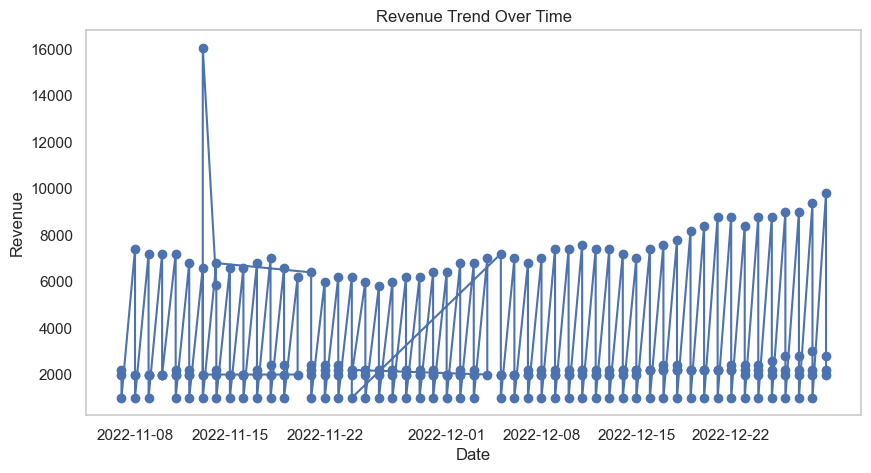

In [30]:
# Q8.Was the revenue increasing or decreasing over the time? 
plt.figure(figsize=(10,5))
plt.plot(df['Date'], df['Revenue'], marker='o')
plt.title('Revenue Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.grid(False)
plt.show()

## Q9.What was the Average 'Quantity Sold' & 'Average Revenue' for each product?


In [38]:
# Average quantity sold and revenue for each product
avg_stats = df.groupby("Product").agg(
    Avg_Quantity=("Quantity", "mean"),
    Avg_Revenue=("Revenue", "mean")
).reset_index()

avg_stats 

,Product,Avg_Quantity,Avg_Revenue
0,Beverages,699.661017,2064.000000
1,Burgers,558.121632,7250.000000
2,Chicken Sandwiches,214.147661,2204.599923
3,Fries,628.125176,2464.205854
4,Sides & Other,200.400802,1000.000000


## Q10. What was the total number of orders or sales made? 
*NOTE*: the total number of sales made is "254".

In [43]:
# The total number of orders or sales made 
Total_no_of_sales = df['Order ID'].nunique() 
print (f'{Total_no_of_sales} is the total numbers of orders')

254 is the total numbers of orders
